# Plotting COVID-19 daily cases and deaths graph

<a href="https://colab.research.google.com/github/maxim75/data-visualization/blob/master/notebooks/COVID_data_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates

## Load and transform data

In [10]:
# load data from ourworldindata.org
# https://ourworldindata.org/coronavirus/country/united-kingdom
owid_covid_data_df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

## Draw graphs

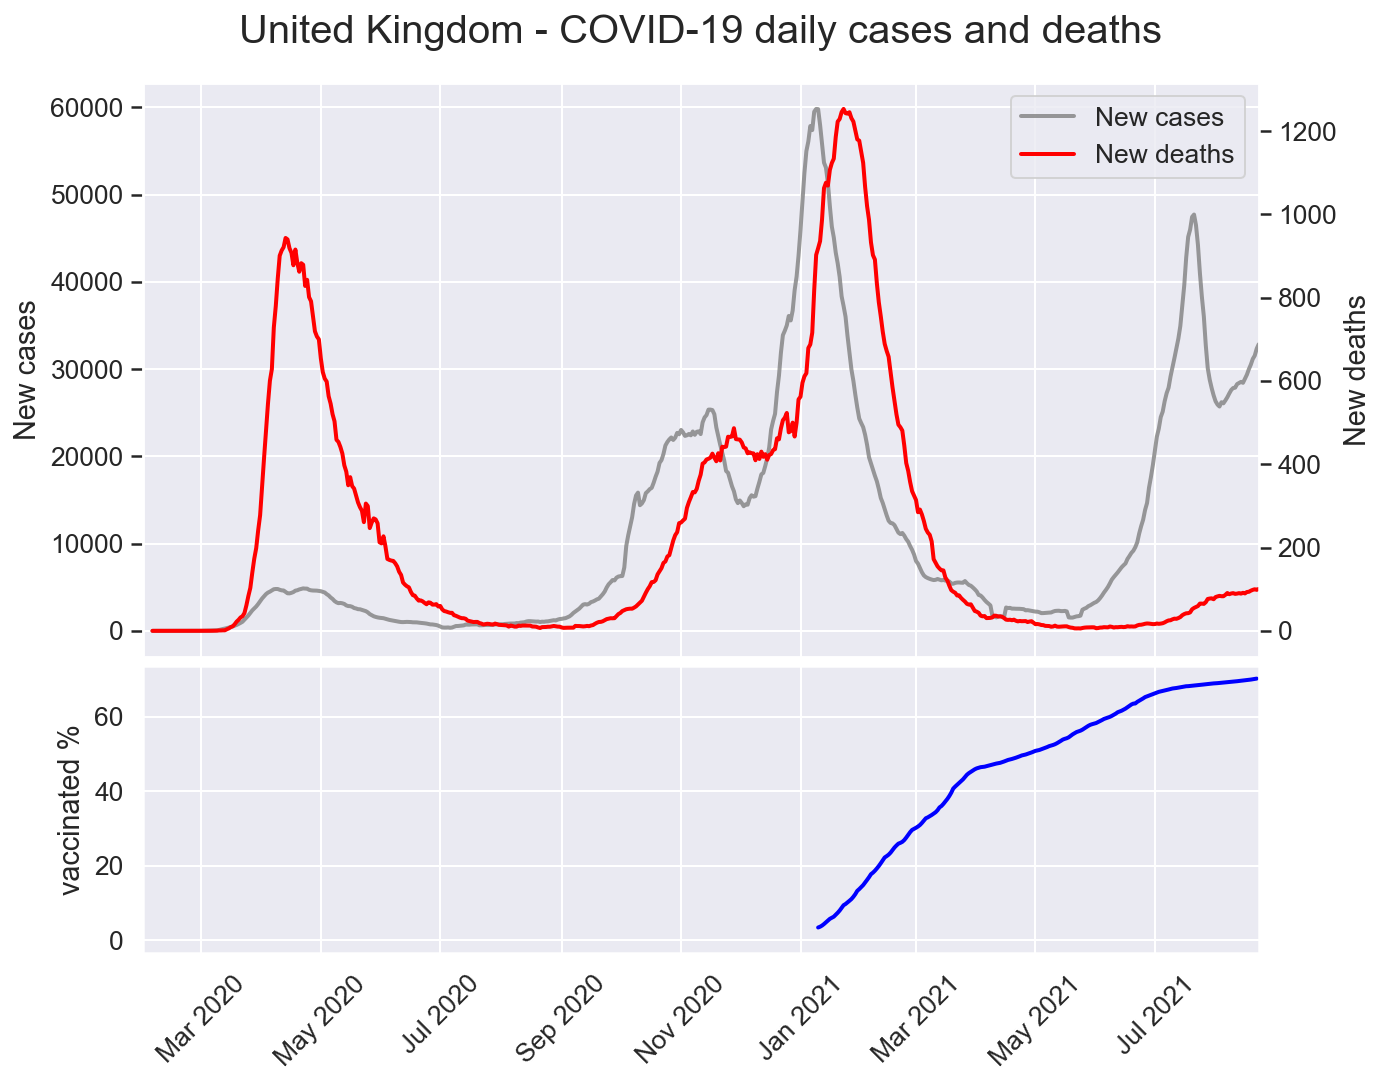

In [16]:
%config InlineBackend.figure_format = 'retina'

country_name = "United Kingdom"

# filter data by single country
cases_deaths_vaccinations_df = owid_covid_data_df[owid_covid_data_df.location == country_name]\
    [["date", "new_cases_smoothed", "new_deaths_smoothed", "people_vaccinated_per_hundred"]]

# convert date from string to datetime
cases_deaths_vaccinations_df["date"] = pd.to_datetime(cases_deaths_vaccinations_df.date)

sns.set_theme("notebook", font_scale=1.2, rc={"lines.linewidth": 2.})

date_range = [cases_deaths_vaccinations_df.date.min(), cases_deaths_vaccinations_df.date.max()]

# set graph size and layout
plt.figure(figsize=(10, 8))
gs1 = matplotlib.gridspec.GridSpec(2, 1, height_ratios= [2, 1], wspace=0.5, hspace=0.02)

# draw new cases 
ax_cases = plt.subplot(gs1[0])
ax_cases.set_title(f"{country_name} - COVID-19 daily cases and deaths", fontsize=20, pad=20)
ax_cases.set_ylabel("New cases")
ax_cases.set_xlim(date_range)
cases_line = ax_cases.plot("date", "new_cases_smoothed", data=cases_deaths_vaccinations_df, label="New cases", color="grey", alpha=.8)

# draw deaths graph on separate y axis (check graph right size)
ax2=ax_cases.twinx()
deaths_line = ax2.plot("date", "new_deaths_smoothed", data=cases_deaths_vaccinations_df, color="red", label="New deaths")
ax2.set_ylabel("New deaths")
ax2.grid(False)

# show legend containing both line labels
ax_cases.legend(loc='upper left', bbox_to_anchor=(0, 1),fontsize=12)
legend_lines = cases_line+deaths_line
legend_labels = [l.get_label() for l in legend_lines]
ax_cases.legend(legend_lines, legend_labels, loc=0)

# draw vaccinations graph
ax_vaccinations = plt.subplot(gs1[1])
ax_vaccinations.tick_params('x', labelrotation=45)
ax_vaccinations.plot("date", "people_vaccinated_per_hundred", data=cases_deaths_vaccinations_df, color="blue")
ax_vaccinations.set_xlim(date_range)
ax_vaccinations.set_ylabel("vaccinated %")

# config x axis date label formatting
date_form = mdates.DateFormatter("%b %Y") # month and year only
fmt_half_year = mdates.MonthLocator(interval=2)
ax_vaccinations.xaxis.set_major_locator(fmt_half_year)
ax_vaccinations.xaxis.set_major_formatter(date_form)